## Homework 8

Felipe Alves - N14713445

## Analytical part

### Exercise 1 
Let $S$ be a discrete set. Show that if $\mathcal{P}(S)$ is a compact subset of $(\ell_1(S), \lVert \cdot \rVert)$ then $S$ must be finite. 

#### Proof

We argue  by contradiction. Let $\mathcal{P}(S)$ is compact but suppose $S$ is countably infinite. 
Since $S$ is assumed to be countable, we can enumerate it as $S = \{x_1,x_2, \ldots\}$. 
Consider the sequence $(\phi_n)$ on $\ell_1(S)$ defined as $\phi_i = \mathbf{1}_{\{x_i\}}$, by which we mean

\begin{equation}
\phi_i(x) = \begin{cases}
            1 & \text{if } x=x_i \\
            0 & \text{otherwise}
            \end{cases}
\end{equation}

First, note that $\{\phi_n\}_{n\in \mathbb{N}} \subset \mathcal{P}(S)$. Moreover, $\forall m,n\in \mathbb{N}$ and $m\ne n$

$$ \lVert \phi_n - \phi_m \rVert= \sum_{i\in\mathbb{N}} \big| \phi_n(x_i) - \phi_m(x_i) \big| = 2 $$

Therefore we have a sequence $(\phi_m)$ in $\mathcal{P}(S)$ that admits no convergent subsequences. That means that $\mathcal{P}(S)$ cannot be compact - remember that a set is compact iff every sequence that on it admits a convergent subsequence - which contradicts out initial assumption.

### Exercise 2

Consider the deterministic Markov chain $X_{t+1} = X_t + 1$ on $\mathbb{Z}$. The corresponding stochastic kernel is $p(x,y) = \mathbf{1}\{x=y-1\}$. Show that no stationary distribution exists. 

#### Proof

We again argue by contradiction. Suppose there exists a stationary distribution $\phi^*$. Being a distribution, $\phi^*$ must satisfy (i) $\phi^*\ge 0$ and (ii) $\lVert \phi^* \rVert = 1$. 

Let $P: \ell_1(\mathbb{Z}) \rightarrow \ell_1(\mathbb{Z})$ be markov operator induced by $p$ so that $\phi^*P(i) = \phi^*(i-1)$ $\forall i \in \mathbb{Z}$. 
Note that $\phi^*$ is a stationary distribution iff $\phi^*P = \phi^*$. 
Given these observations, we have for any $i\in \mathbb{Z}$

\begin{align*}
    \phi^*(i) & = \phi^*P(i) = \phi^*(i-1) = \phi^*P(i-1) = \phi^*(i-2)  = \ldots\\
    \phi^*(i) & = \phi^*P(i+1) = \phi^*(i+1) = \phi^*P(i+2) = \phi^*(i+2)= \ldots \\
\end{align*}

so that $\phi^*(i) = c\ge 0 \quad \forall i\in \mathbb{Z}$. However, $\phi^*\in \ell_1(\mathbb{Z})$ implies $c$ cannot be strictly positive, since, otherwise, $\sum_{i\in\mathbb{Z}} |c| \rightarrow \infty$. Hence $c=0$. But that contradicts our assumption that $\phi^*$ is a distribution, since $\lVert \phi^* \rVert = 0$. 

## Coding part

In [1]:
using QuantEcon
using PyPlot

### Exercise 3

Argue that the stochastic kernel is globally stable for every $q$ and $Q$. 

We are going to argue globally stability on the basis of the following theorem.

**Theorem** If $S$ is finite and $P$ is both aperiodic and irreducible, then $P$ is globally stable

First, let's remember what aperiodic and irreducible means. Consider an stocahstic kernel $p$ on $S$ and arbitrary states $x,y$. 

*Def.:* We say that $y$ is *accessible* from $x$ if $x=y$ or $\exists k \in \mathbb{N}$ such that $p^k(x,y)>0$. A stochastic kernel $p$ is called *irreducible* if every state is accessible from any other.

*Def.:* We say that state $x$ is *aperiodic* under $p$ if $\exists n \in \mathbb{N}$ such that $\forall k \ge n \Rightarrow p^k(x,x)>0$. A stochastic kernel $p$ on $S$ is called aperiodic if every state in $S$ is aperiodic under $p$.

Note that the stochastic matrix induced by the $S,s$ rule has $p(x,x)>0 \ \forall x\in S$ so it readily checked that it is aperiodic. 

As for irreducible property, if $x\le q$ we have that every $y$ is acessible. If $x>q$ then $p(y,x)=0 \ \forall y\in S$ such that $y>x$. However, it is easy to see that the probability of moving from $x$ to $y$ in two periods, $p^2(y,x)$, is already strictly positive since any demand $d \ge (x-q)$ would ensure a $x'=Q$ and, therefore, a positive probability of transiting to $y$ on the following period. 

### Exercise 4

In [2]:
function inventoryP(q::Int64 = 2, Q::Int64 = 5)
    
    q>Q && throw(ArgumentError("q must be smaller than Q"))
    
    #== distribution for Demand ==#     
    Ddist = Float64[0.5^(d+1) for d=Q:-1:0]
    Ddist[1] += 1- sum(Ddist)
    
    #== init stochastic matrix ==#
    P = zeros(Q+1,Q+1)

    for ind=1:Q+1
        ind <= q+1 ? (P[ind,:] = Ddist) : (P[ind,1:ind] = [sum(Ddist[1:end-(ind-1)]); Ddist[end-(ind-2):end]])
    end

    return P
end

inventoryP (generic function with 3 methods)

We are going to use the quantecon's MarkovChain type to compute the stationary distribution. 
Before using it, let's check the documentation

In [3]:
?QuantEcon.MarkovChain

Finite-state discrete-time Markov chain.

It stores useful information such as the stationary distributions, and communication, recurrent, and cyclic classes, and allows simulation of state transitions.

##### Fields

  * `p::Matrix` The transition matrix. Must be square, all elements must be positive, and all rows must sum to unity


In [4]:
#== Ss rules ==#
Q = 5
q = 2

#= checking the function =#
P = inventoryP(10,Q)

LoadError: LoadError: ArgumentError: q must be smaller than Q
while loading In[4], in expression starting on line 6

In [5]:
P = inventoryP(q,Q)
mc = MarkovChain(P, 0:Q)

Discrete Markov Chain
stochastic matrix of type Array{Float64,2}:
6x6 Array{Float64,2}:
 0.03125  0.03125  0.0625  0.125  0.25  0.5
 0.03125  0.03125  0.0625  0.125  0.25  0.5
 0.03125  0.03125  0.0625  0.125  0.25  0.5
 0.125    0.125    0.25    0.5    0.0   0.0
 0.0625   0.0625   0.125   0.25   0.5   0.0
 0.03125  0.03125  0.0625  0.125  0.25  0.5


On Exercise 3 we argued that the matrix $P$ was irreducible and aperiodic for any given $(q,Q)$. 

We can check this for the particular case with $Q = 5$ and $q=2$.

In [6]:
is_aperiodic(mc)

true

In [7]:
is_irreducible(mc)

true

The MarkovChain `type` also offers a simple way to compute the stationary distribution. 

In [8]:
ψ1 = mc_compute_stationary(mc)

6-element Array{Float64,1}:
 0.0625
 0.0625
 0.125 
 0.25  
 0.25  
 0.25  

Another possibility is to iterate over any initial distribution until convergence

In [13]:
ψinit = abs(randn(6))
ψinit = ψinit'/norm(ψinit,1)

ψ2 = ψinit
dist = 1.0
it = 0
while dist>1e-5
    
    it +=1
    ψp = ψ2 * P
    dist = norm(ψp - ψ2,1)
    ψ2 = ψp
    it%2 ==0 && @printf "Iteratio %d: distance %.3f \n" it dist
end

Iteratio 2: distance 0.040 
Iteratio 4: distance 0.007 
Iteratio 6: distance 0.001 
Iteratio 8: distance 0.000 
Iteratio 10: distance 0.000 



Comparing the two solutions


In [14]:
[ψ1 round(ψ2',4)]

6x2 Array{Float64,2}:
 0.0625  0.0625
 0.0625  0.0625
 0.125   0.125 
 0.25    0.25  
 0.25    0.25  
 0.25    0.25  

### Exercise 6

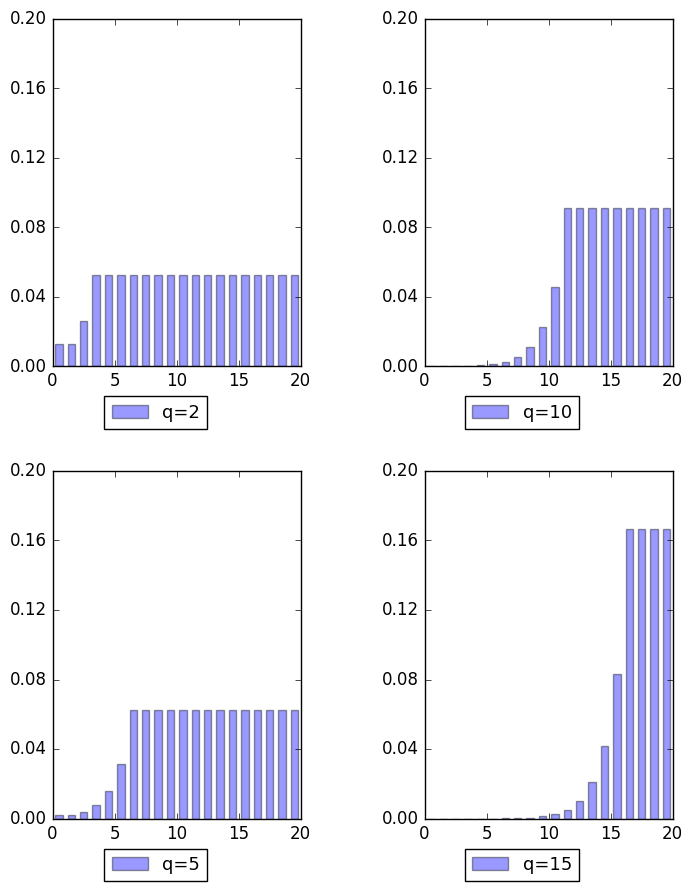

In [36]:
Q = 20 
q = [2,5,10,15]

#= Create the figure =#
fig, axes = subplots(2, 2, figsize = (8,10))
i = 0
#= subplots_adjust function =#
PyPlot.subplots_adjust(wspace = 0.5, hspace = 0.3)
for qq in q
    i += 1
    P = inventoryP(qq,Q)
    mc = MarkovChain(P, 0:Q)
    ψ = mc_compute_stationary(mc)
    ax = axes[i]
    ax[:set_yticks]((0:0.04:0.20))
    ax[:bar](mc.state_values+0.2, ψ, 0.6, color = "blue", alpha=0.4, label ="q=$qq")
    ax[:set_xlim](0,20)
    ax[:set_ylim](0,0.20)
    ax[:legend](bbox_to_anchor = (0.66,-0.06,0.,0.), fontsize = 13)
end

### Comments

As one should expect, the higher the cutoff $q$, smaller the probability on the lower part of the state space.